# Social Network Ads Model Creation

### Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Load the dataset

In [2]:
df=pd.read_csv(r"C:\Users\aksmk\OneDrive\Desktop\DSA\Datasets\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.drop('User ID',axis=1,inplace=True)

### Check for null values

In [4]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No null values present in the dataset.

### Check for outliers

<Axes: >

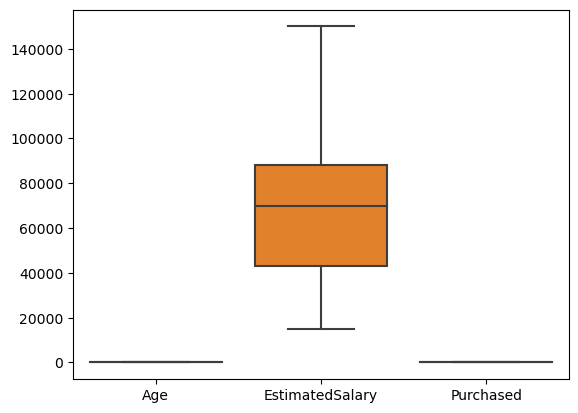

In [5]:
sns.boxplot(df)

No outliers present in the dataset.

### Label encoding

In [6]:
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

### Split x and y

In [7]:
x=df.drop('Purchased',axis=1)
y=df.Purchased

### Standard scaling

In [8]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)

# Modelling

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,random_state=0,test_size=0.2)

### KNN 

In [10]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean').fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)*100

95.0

Got accuracy of 95%.

### SVM

In [11]:
svm=SVC(kernel='rbf').fit(x_train,y_train)
y_pred=svm.predict(x_test)
accuracy_score(y_test,y_pred)*100

95.0

Got accuracy of 95%.

### Random Forest

In [12]:
rf=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='gini',min_samples_split=3,random_state=0).fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)*100

92.5

Got accuracy of 92.5%.

### Decision Tree

In [13]:
dt=DecisionTreeClassifier(max_depth=50,criterion='gini',min_samples_leaf=5).fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)*100

93.75

Got accuracy of 93.75%.

### Logistic Regression

In [14]:
log_reg=LogisticRegression().fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
accuracy_score(y_test,y_pred)*100

91.25

Got accuracy of 91.25%.

Web got highest accuracy for KNN and SVM models. So we use KNN model for our web app creation.

### Save KNN model and x by pickling

In [15]:
import pickle
with open('model.pkl','wb') as model_file:
  pickle.dump(knn,model_file)

Also we save x in order to use in python flask.

In [16]:
import pickle
with open('x.pkl','wb') as x_file:
  pickle.dump(x,x_file)